In [81]:
from sklearn.neighbors import KNeighborsClassifier
import dtaidistance

#from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

In [62]:
def L2_signals(v1, v2):
    return dtaidistance.dtw.distance(v1, v2, window=1)

def DTW_signals(v1, v2):
    return dtaidistance.dtw.distance(v1, v2)

def DTW_signals_path(v1, v2):
    return dtaidistance.dtw.warping_path(v1, v2)

def DTW_signals_warping_paths(v1, v2):
    return dtaidistance.dtw.warping_paths(v1, v2)

def DTW_signals_visualization(v1, v2, path):
    return dtaidistance.dtw_visualisation.plot_warping(v1, v2, path)

def DTW_signals_plot_warping_path(v1, v2, path, matr):
    dtaidistance.dtw_visualisation.plot_warpingpaths(v1, v2, matr, path)



def DTW_signals1(v1, v2):
    n = len(v1)
    dp = np.zeros((n, n))
    dp[0][0] = (v1[0] - v2[0]) ** 2
    for i in range(1, n):
        dp[i][0] = dp[i - 1][0] + (v1[i] - v2[0]) ** 2
    for i in range(1, n):
        dp[0][i] = dp[0][i - 1] + (v1[0] - v2[i]) ** 2
    for i in range(1, n):
        for j in range(1, n):
            dp[i][j] = (v1[i] - v2[j]) ** 2 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    return dp[n - 1][n - 1]

In [22]:
def DTW_signals(v1, v2):
    return dtaidistance.dtw.distance(v1, v2)

In [73]:
v1 = np.array([0, 1, 0], dtype=np.double)
v2 = np.array([1, 0, 1], dtype=np.double)

In [74]:
DTW_signals(v1, v2) ** 2

2.0000000000000004

In [75]:
L2_signals(v1, v2) ** 2

2.9999999999999996

In [67]:
path = DTW_signals_path(v1, v2)
path

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 3)]

In [68]:
dist, matr = DTW_signals_warping_paths(v1, v2)
dist, matr

(2.23606797749979,
 array([[0.        ,        inf,        inf,        inf,        inf],
        [       inf, 1.        , 1.        , 1.41421356, 2.44948974],
        [       inf, 1.        , 1.41421356, 1.        , 1.41421356],
        [       inf, 1.41421356, 2.23606798, 1.41421356, 1.        ],
        [       inf, 1.73205081, 1.41421356, 1.73205081, 2.23606798]]))

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12a9f54fd0>,
       dtype=object))

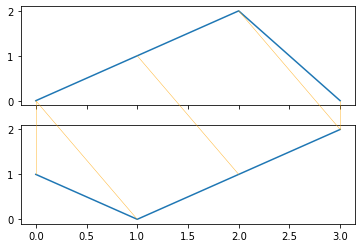

In [69]:
DTW_signals_visualization(v1, v2, path)

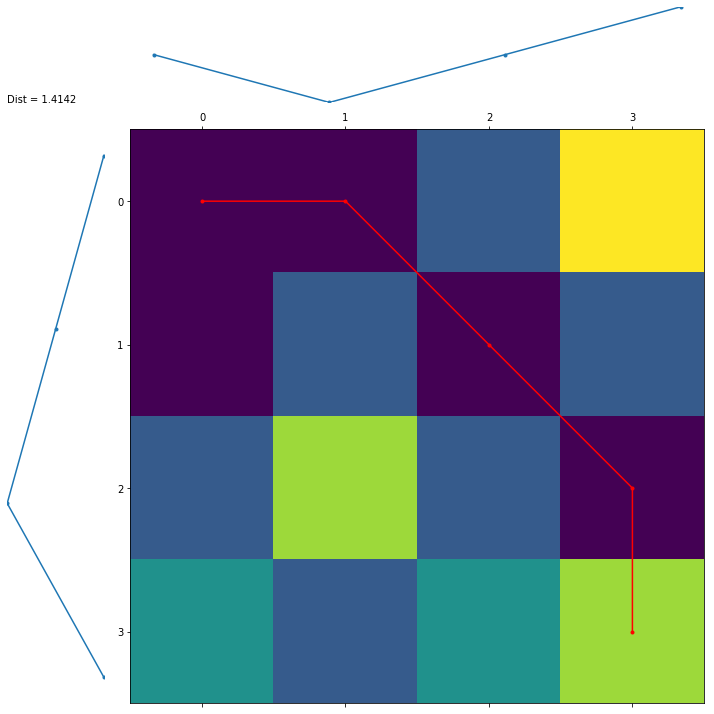

In [70]:
DTW_signals_plot_warping_path(v1, v2, path, matr)

In [76]:
DTW_signals1(v1, v2)

2.0

In [82]:
class SimpleExperiment:
    
    def __init__(self, sig1, sig2):
        self.sig1 = sig1
        self.sig2 = sig2
        
    def calc_dist(self):
        self.L2 = L2_signals(v1, v2)
        self.DTW = DTW_signals(v1, v2)
        print('L2-distance value', self.L2)
        print('L2-squared value', self.L2 ** 2)
        print('DTW-distance value', self.DTW)
        print('DTW-squared value', self.DTW ** 2)
        return (self.L2, self.DTW)
    
    def visualise(self):
        self.path = DTW_signals_path(self.sig1, self.sig2)
        self.matr = DTW_signals_warping_paths(self.sig1, self.sig2)[1]
        DTW_signals_visualization(self.sig1, self.sig2, self.path)
        DTW_signals_plot_warping_path(self.sig1, self.sig2, self.path, self.matr) 

L2-distance value 1.7320508075688772
L2-squared value 2.9999999999999996
DTW-distance value 1.4142135623730951
DTW-squared value 2.0000000000000004


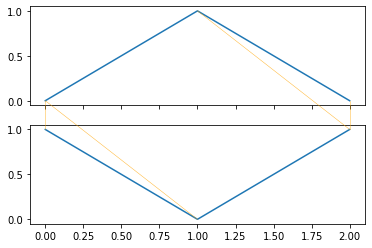

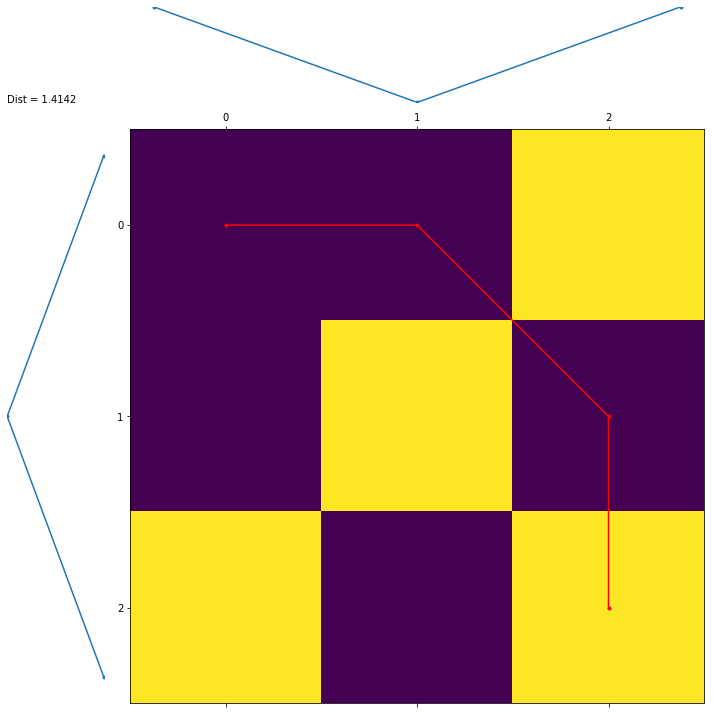

In [84]:
exp = SimpleExperiment(v1, v2)

exp.calc_dist()
exp.visualise()

In [4]:
def DTW_time_series(v1, v2, metric):
    n = len(v1)
    m = len(v2)
    dp = np.zeros((n, m))
    dp[0][0] = metric(v1[0], v2[0])
    for i in range(1, n):
        dp[i][0] = dp[i - 1][0] + metric(v1[i], v2[0])
    for i in range(1, m):
        dp[0][i] = dp[0][i - 1] + metric(v1[0], v2[i])
    for i in range(1, n):
        for j in range(1, m):
            dp[i][j] = metric(v1[i], v2[j]) + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])
    return dp[n - 1][m - 1]

In [5]:
class Experiment:
    '''
    MDTW model for machine learning solving classification problem
    '''
    
    def __init__(self, n_neighbors=5):
        self.L2_model = KNeighborsClassifier(n_neighbors, metric=L2_signals)
        self.DTW_model = KNeighborsClassifier(n_neighbors, metric=DTW_signals)
    
    def fit(self, X, y):
        self.L2_model.fit(X, y)
        self.DTW_model.fit(X, y)
        
    def predict(self, y):
        self.L2_predicted = self.L2_model.predict(y)
        self.DTW_predicted = self.DTW_model.predict(y)
        
    def get_accuracy(self, true_val):
        return (np.sum(true_val == self.L2_predicted) / len(true_val),
                np.sum(true_val == self.DTW_predicted) / len(true_val))